# TP3   Application de l'algorithme génétique  pour la sélection des caractéristiques: Evolutionary feature selection

La réduction de dimension est une étape importante en apprentissage automatique. Elle a pour objectif de remplacer un ensemble de caractéristiques de taille importante par un ensemble de taille réduite. La réduction de dimension permet d’améliorer les performances des modèles et d’accélérer le temps d’apprentissage. La réduction de dimension peut se faire principalement par deux méthodes :

Sélection des caractéristiques (feature selection): elle prend en entrée un ensemble de caractéristiques de départ et elle fournit en sortie un sous-ensemble de taille réduite qui contient seulement les caractéristiques pertinentes et non redondantes.
    
Extraction des caractéristiques (feature extraction): elle consiste à transformer l'espace des caractéristiques de départ en un espace de dimension réduite qui contient le maximum d’informations sur les données.
    
Parmi les méthodes de sélection des caractéristiques, on trouve :

- Les méthodes filtres : A partir d’un ensemble de N caractéristiques, on mesure pour chaque caractéristique son degré
de pertinence ou de contribution dans le modèle.Les K caractéristiques les plus pertinentes sont ainsi sélectionnées.  
- Les méthodes wrapper :  A partir d’un ensemble de N caractéristiques, différents sous-ensembles de caractéristiques sont évalués par un algorithme d'apprentissage automatique. L’objectif est de trouver le meilleur sous-ensemble de caractéristiques qui maximise les performances du modèle. Les sous-ensembles de caractéristiques sont trouvés par différentes méthodes telle que la recherche exhaustive.

Les méthodes wrapper sont plus perfomantes que les méthodes filtres mais possédent un coût computationnel élevé.

Dans ce TP, nous allons utiliser les AG pour trouver le sous-ensemble de caractéristiques qui maximise les performances du modèle de classification MLP selon la méthode wrapper.


## 1. Dataset Iris

Le jeu de données Iris est constitué de trois classes de la fleur Iris. Il contient 150 instances telle que chacune d'elles est composée de quatre attributs pour représenter une fleur d’Iris. Chaque donnée du jeu de données Iris est étiquetée par une classe de fleur.  


In [1]:
#import des librairies
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn import datasets


# Import libraries  pour la classification

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score


In [2]:
# Charger le jeu de données Iris
iris = datasets.load_iris()
target = datasets.load_iris().target

# Convertir Iris Dataset au pandas dataframe
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['Target'] = iris.target

df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### vérifier l'existance des valeurs NaN

In [4]:
df_iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Target               0
dtype: int64

aucune valeur NaN, donc on ne fait aucun prétraitement

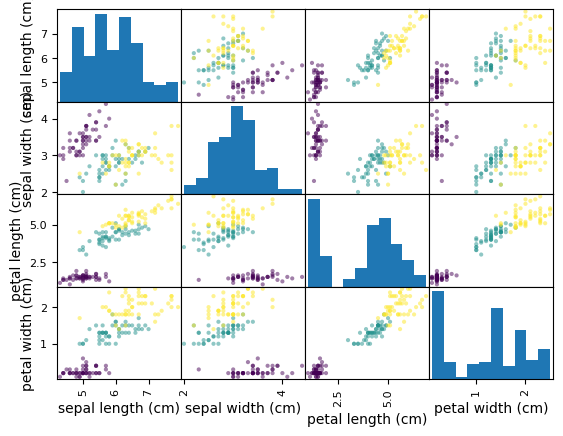

In [5]:
# Define the variable 'iris_data'
iris_data = df_iris.drop('Target', axis=1)

# Visualize the matrix of correlation between the features
pd.plotting.scatter_matrix(iris_data, c=df_iris['Target'])
plt.show()

La matrice de correlation permet de voir le degré de corrélation entre les features du dataset Iris.

<Figure size 800x300 with 0 Axes>

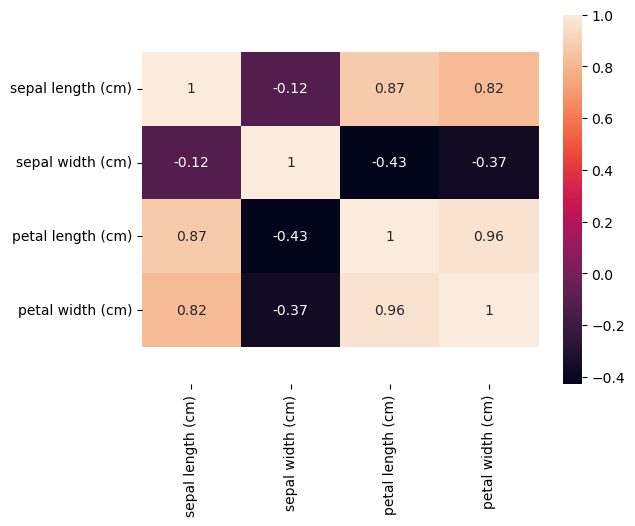

<Figure size 800x300 with 0 Axes>

In [6]:
import seaborn as sns
cor = iris_data.corr()
ax = sns.heatmap(cor, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.figure(figsize=(8,3))

La matrice de corrélationn, indique une forte corrélation entre petal length et petal width. On voit aussi une bonne corrélation entre Petal width et sepal length et entre Petal length et sepal length.

On calcule et on visualise la corrélation entre chaque feature et le Target.  On assigne un score de relevance à chaque feature.

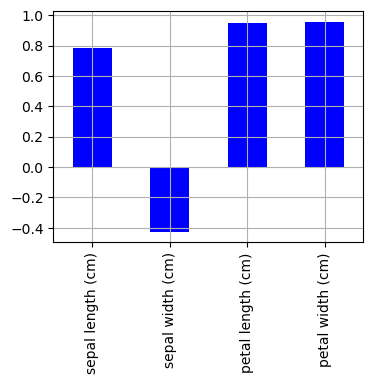

In [7]:
features = df_iris.drop('Target', axis=1)
corr_with_target=features.corrwith(df_iris['Target']).plot(kind='bar', grid=True, figsize=(4,3), color='blue')


D'aprés le plot, on voit que les deux features les plus importantes sont Petal length et Petal width.

In [8]:
# normalize dataset
iris_data=df_iris.drop('Target',axis = 1)
iris_data.head()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(iris_data)
iris_norm=scaler.transform(iris_data)

## 2. Dataset Diabetes
Le dataset contient 768 observations telle que chaque observation possède 8 features.
On veut prédire si une personne est atteinte du diabete ou non.

In [9]:
data = pd.read_csv("diabetes.txt")
data.to_csv('diabetes.csv',index=False)
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df_diabetes = pd.read_csv('diabetes.csv', names=names)
print(df_diabetes.head())
print(df_diabetes.info())

   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


#### vérifier l'existance des valeurs NaN

In [10]:
df_diabetes.isnull().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

aucune valeur donc on ne faut aucun prétraitement sur le dataset

<Figure size 1000x1000 with 0 Axes>

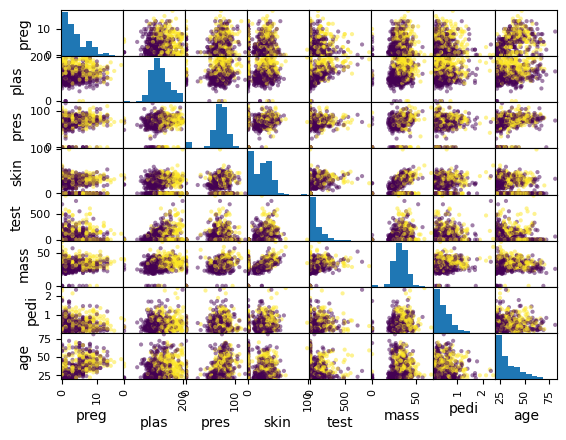

<Figure size 1000x1000 with 0 Axes>

In [11]:
# visualiser la matrice de corrélation entre les features
diabetes_data=df_diabetes.drop('class',axis=1)
pd.plotting.scatter_matrix(diabetes_data, c=df_diabetes['class'])
plt.figure(figsize=(10, 10))

La matrice de correlation permet de voir le degré de corrélation entre les features du dataset Diabetes.

<Figure size 800x300 with 0 Axes>

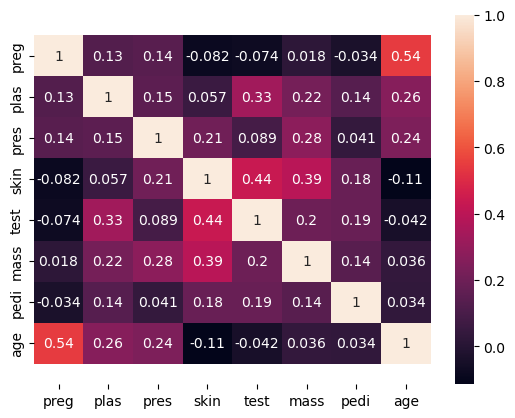

<Figure size 800x300 with 0 Axes>

In [12]:
features = df_diabetes.drop('class', axis=1)
cor = features.corr()
ax = sns.heatmap(cor, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.figure(figsize=(8,3))

(8.5, -0.5)

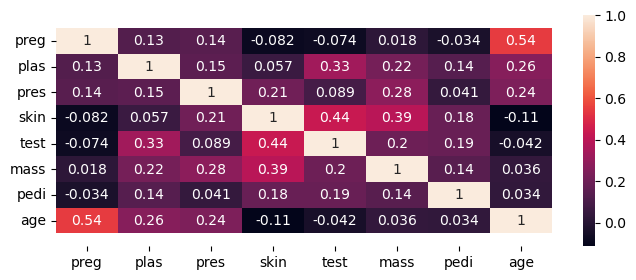

In [13]:
plt.figure(figsize=(8,3))
features = df_diabetes.drop('class', axis=1)
cor = features.corr()
ax = sns.heatmap(cor, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

On calcule et on visualise la corrélation entre chaque feature et le Target.  On assigne un score de relevance de chaque feature.

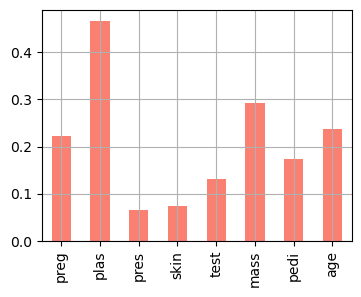

In [14]:
corr_with_target=features.corrwith(df_diabetes['class']).plot(kind='bar', grid=True, figsize=(4,3), color='salmon')

# solution de tp03


Proposer une implémentation de l'algorithme génétique pour extraire effectuer une sélection des caractéristiques (wrapper méthod) pour chacun des datasets.


### 1- Effectuer une classification (MLP) du dataset avec toutes les features. soit acc_original l'accuracy avec toutes les features.


In [15]:

import random

# Chargement du dataset
diabetes = pd.read_csv("diabetes.txt")
diabetes.to_csv('diabetes.csv',index=False)
X, y = diabetes.iloc[:, :-1], diabetes.iloc[:, -1]
# Division du dataset en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle MLP de référence
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
acc_original = accuracy_score(y_test, mlp.predict(X_test))
print("Accuracy with all features:", acc_original)

Accuracy with all features: 0.6298701298701299


### 2- Choisir le codage du chromosome




choisir le codage binaire

### 3- initialiser une population de N chromosomes


In [16]:
# Nombre de caractéristiques
n_features = X.shape[1]

# Nombre de chromosomes dans la population
n_population = 10

# Initialisation d'une population de chromosomes binaires
population = np.random.randint(2, size=(n_population, n_features))

print("Population of chromosomes:")
print(population)

Population of chromosomes:
[[1 1 0 0 0 0 1 0]
 [0 0 1 1 0 1 0 0]
 [0 1 0 1 1 0 0 1]
 [0 1 1 0 0 1 1 1]
 [0 0 0 1 1 0 1 1]
 [1 1 0 1 1 0 1 0]
 [0 0 0 0 0 0 1 0]
 [1 1 1 0 1 1 0 0]
 [1 1 0 0 1 1 1 0]
 [0 1 1 0 0 1 1 0]]


### 4- Evaluer la population (fitness=accuracy du classificateur MLP)


In [17]:
def evaluate_population(population, X_train, y_train, X_test, y_test, mlp):
    # Initialize an array to store the fitness of each chromosome
    n_population = population.shape[0]
    fitness = np.zeros(n_population)

    # Evaluate the fitness of each chromosome in the population
    for i in range(n_population):
        # Select features based on the chromosome
        X_train_selected = X_train.iloc[:, population[i] == 1]
        X_test_selected = X_test.iloc[:, population[i] == 1]

        # Train the MLP with the selected features
        mlp.fit(X_train_selected, y_train)

        # Predict the test set results
        y_pred = mlp.predict(X_test_selected)

        # Calculate the accuracy of the model with the selected features
        fitness[i] = accuracy_score(y_test, y_pred)    
    return fitness


### 5- Génération de la nouvelle population



In [18]:
def generate_new_population(population, fitness, n_features):
    n_population = population.shape[0]

    # Selection
    parents = np.random.choice(np.arange(n_population), size=n_population, p=fitness/fitness.sum())

    # Crossover
    crossover_point = np.random.randint(low=1, high=n_features-1)
    children = np.zeros((n_population, n_features), dtype=np.int32)
    for i in range(0, n_population, 2):
        parent1, parent2 = population[parents[i]], population[parents[i+1]]
        children[i, :crossover_point] = parent1[:crossover_point]
        children[i, crossover_point:] = parent2[crossover_point:]
        children[i+1, :crossover_point] = parent2[:crossover_point]
        children[i+1, crossover_point:] = parent1[crossover_point:]

    # Mutation
    mutation_mask = np.random.uniform(size=(n_population, n_features)) < 0.01
    children = np.logical_xor(children, mutation_mask)

    return children

### 6- si critère d'arrêt satifait aller à 7 sinon revenir vers 4


In [19]:
# Initialize the generation counter
generation = 0

# Set the maximum number of generations
max_generations = 100

# Set the target fitness
target_fitness = 0.9

# Start the genetic algorithm


# Evaluate the fitness of the population
fitness = evaluate_population(population, X_train, y_train, X_test, y_test, mlp)

# Print the best chromosome and its fitness
best_chromosome = population[np.argmax(fitness)]
best_fitness = np.max(fitness)
print("Best Chromosome:", best_chromosome)
print("Best Fitness:", best_fitness)


Best Chromosome: [0 1 1 0 0 1 1 1]
Best Fitness: 0.7662337662337663


### 7- afficher le meilleur chromosome ainsi que sa fitness.


In [20]:
# Print the best chromosome and its fitness
best_chromosome = population[np.argmax(fitness)]
best_fitness = np.max(fitness)
int_array = best_chromosome.astype(int)


print("Best Chromosome:", int_array)
print("Best Fitness:", best_fitness)

Best Chromosome: [0 1 1 0 0 1 1 1]
Best Fitness: 0.7662337662337663



#### Est ce que la fitness (accuracy du MLP) est suffisante pour trouver le sous_ensemble optimal de features à votre avis?

<span style="color:green">donc, Oui la fitness (accuracy du MLP) est suffisante pour trouver le sous_ensemble optimal de features<span style="color:red"> mais </span> ne garantit pas nécessairement que ce sous-ensemble de fonctionnalités est optimal.
</span>